# 机器学习练习1_linear regression

## 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv( 'ex1data1.txt', header = None, names =['Population', 'Profit'])

In [5]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


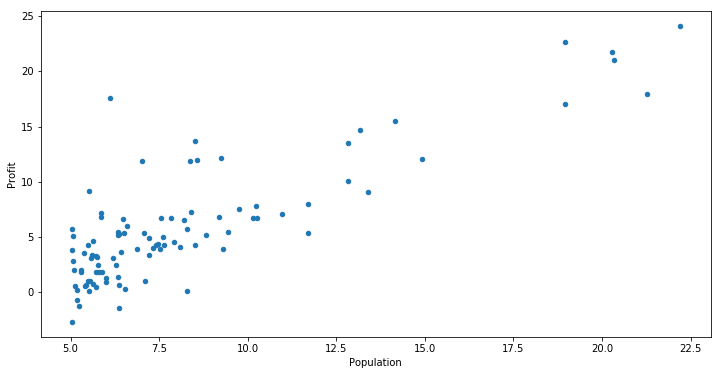

In [7]:
data.plot.scatter( x='Population', y='Profit', figsize = (12, 6))

In [8]:
# DataFrame.insert(loc, column, value, allow_duplicates=False) 
# 增加一列数
data.insert(0, 'ones', 1)

In [9]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [10]:
data.shape

(97, 3)

In [12]:
cols = data.shape[1] # 列的行数
X = data.iloc[:,0:cols-1]

In [14]:
Y = data.iloc[: , cols-1: cols]

In [16]:
X = np.matrix(X.values)

In [17]:
Y = np.matrix(Y.values)

In [18]:
theta = np.matrix(np.array([0,0]))

In [20]:
def computerCost(X, Y, theta):
    inner = np.power(((X * theta.T)-Y), 2)
    return np.sum(inner)/(2*len(X))

In [21]:
computerCost(X, Y, theta)

32.072733877455676

# 梯度下降

In [22]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computerCost(X, y, theta)
    return theta, cost

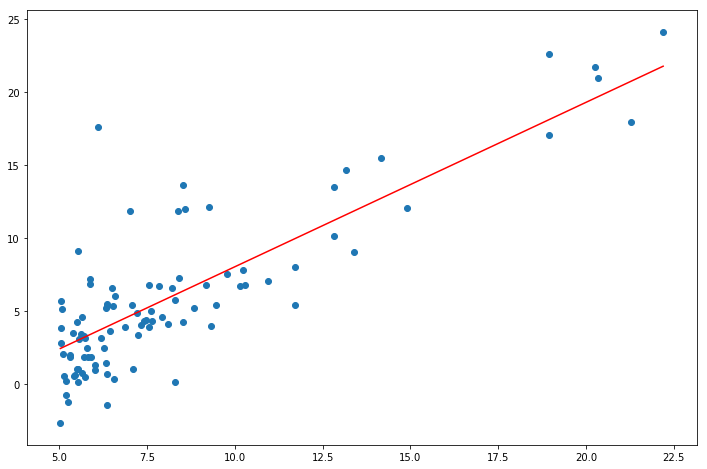

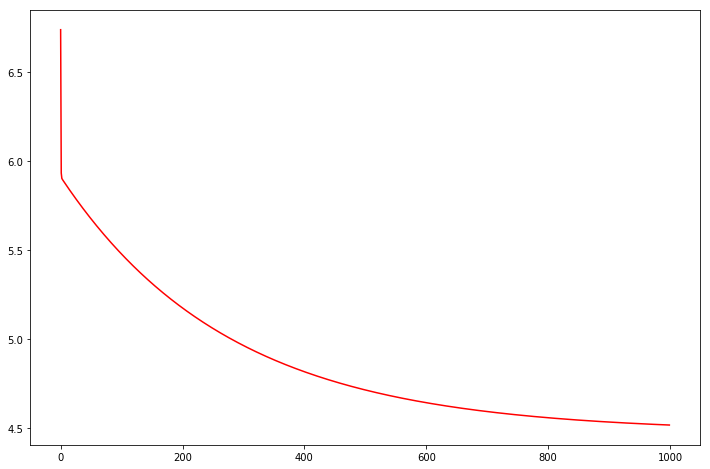

In [23]:
change = 0.01
times  = 1000
gt, cost = gradientDescent(X, Y, theta, change, times)
x = np.linspace(data.Population.min(), data.Population.max(),100)
f = gt[0, 0] + x* gt[0,1]
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(range(times), cost, 'r', label='cost')
plt.show()

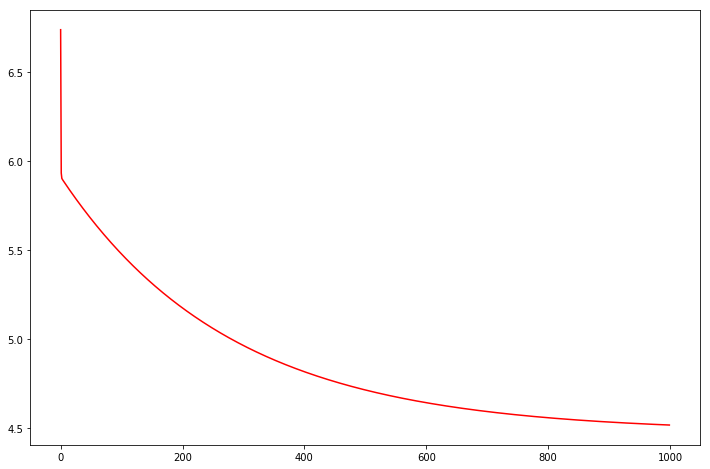

In [24]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(range(times), cost, 'r', label='cost')
plt.show()

In [25]:
changetimes = [1,100,1000]

In [34]:

import random
def randomcolor():
    colorArr = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ""
    for i in range(6):
        color += colorArr[random.randint(0,14)]
    return "#"+color


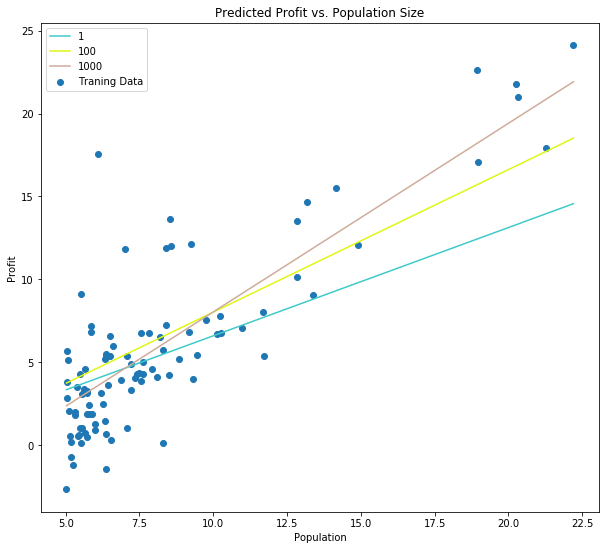

In [29]:

alpha = 0.01
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data.Population, data.Profit, label='Traning Data')
x = np.linspace(data.Population.min(), data.Population.max(),100)
for i in range(len(changetimes)):
    theta1 = np.matrix(np.array([0,0]))
    theta, cost = gradientDescent(X, Y, theta, alpha, changetimes[i])
    f = theta[0, 0] + x* theta[0,1]
    ax.plot(x, f, c = randomcolor(), label = str(changetimes[i]))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [32]:
# 训练次数对最终结果的影响
changetimes = range(1,1000,100)
theatar = np.zeros((len(changetimes), theta.shape[1]))
costlist = { changetimes[0]: np.zeros(changetimes[0])}
alpha = 0.01
for i in range(len(changetimes)):
    theatar[i], costlist[changetimes[i]] = gradientDescent(X, Y, np.matrix(np.array([0,0])), alpha, changetimes[i])


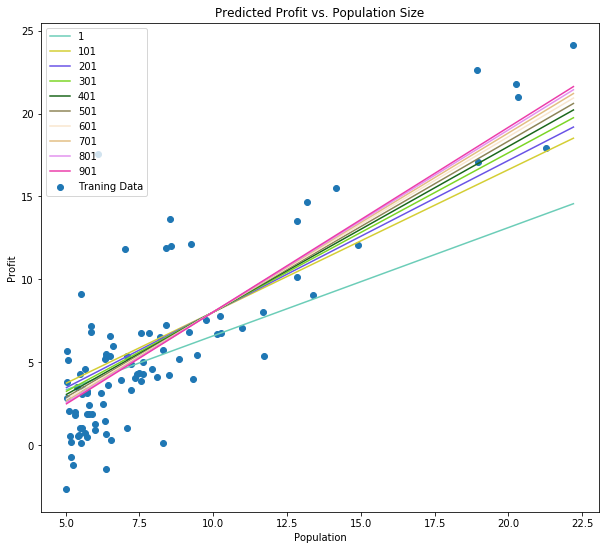

In [35]:
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data.Population, data.Profit, label='Traning Data')
x = np.linspace(data.Population.min(), data.Population.max(),100)
for i in range(len(changetimes)):
    f = theatar[i, 0] + x* theatar[i,1]
    ax.plot(x, f, c = randomcolor(), label = str(changetimes[i]))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

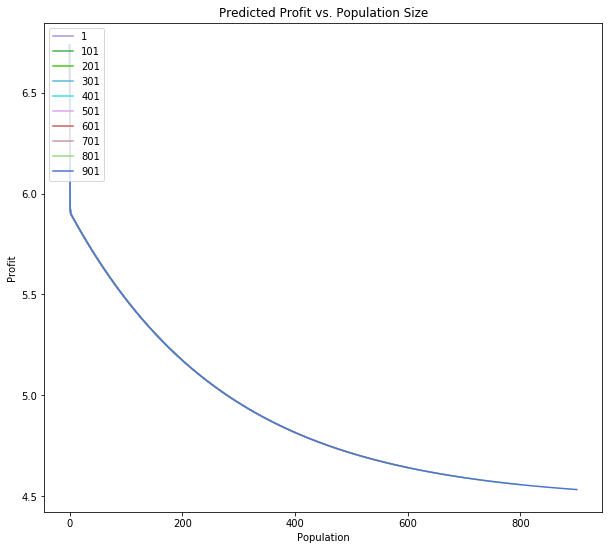

In [36]:
fig,ax = plt.subplots(figsize=(10,9))
for i in range(len(changetimes)):
    ax.plot(range(len(costlist[changetimes[i]])), costlist[changetimes[i]], c = randomcolor(), label = str(changetimes[i]))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [37]:
# 训练次数对最终结果的影响
alpha = [10,6,5,4,3,2,1]
costlist = {alpha[0]: np.zeros(4000)}
for i in range(len(alpha)):
    theatar[i], costlist[alpha[i]/1000] = gradientDescent(X, Y, np.matrix(np.array([0,0])), alpha[i]/1000, 4000)

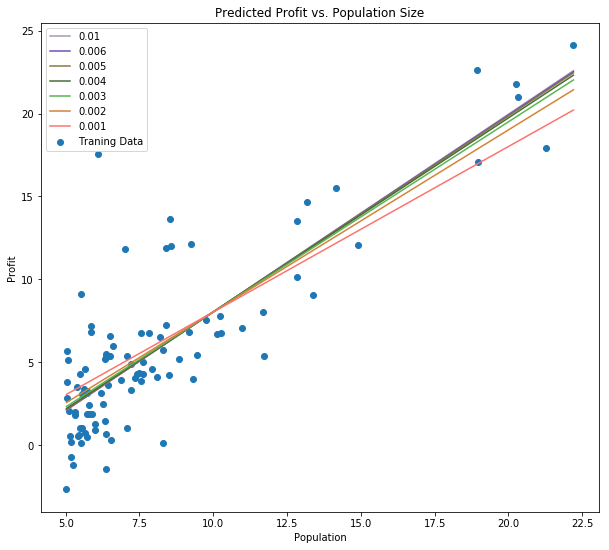

In [38]:
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data.Population, data.Profit, label='Traning Data')
x = np.linspace(data.Population.min(), data.Population.max(),100)
for i in range(len(alpha)):
    f = theatar[i, 0] + x* theatar[i,1]
    ax.plot(x, f, c = randomcolor(), label = str(alpha[i]/1000))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

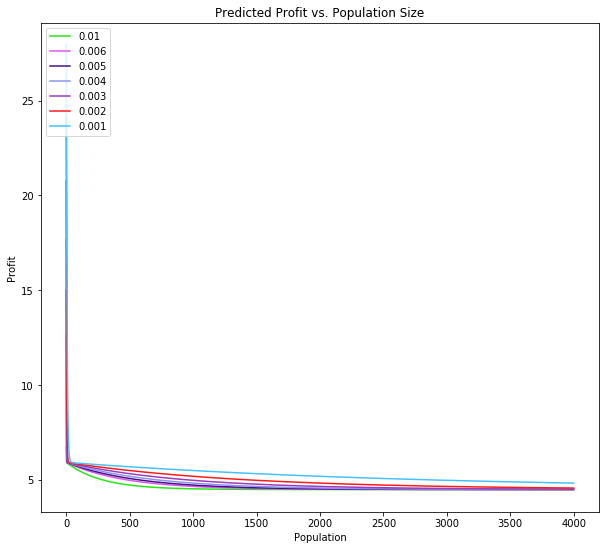

In [311]:
fig,ax = plt.subplots(figsize=(10,9))
for i in range(len(alpha)):
    ax.plot(range(len(costlist[alpha[i]/1000])), costlist[alpha[i]/1000], c = randomcolor(), label = str(alpha[i]/1000))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 多变量的线性回归学习

In [111]:
data2 = pd.read_csv('ex1data2.txt', header = None , names =['Size', 'Bedrooms', 'Price'])

In [112]:
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 数据归一化
1. 学习链接：[学习链接](https://blog.csdn.net/u011089523/article/details/80198312)
2. Z-score标准化方法；

In [113]:
data2 = (data2 - data2.mean())/ data2.std()

In [114]:
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [115]:
# 对数据进行矩阵化处理
data2.insert(0, 'ones', 1)

cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1: cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
alpha= 0.01
inters = 1000
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, inters)

In [116]:
def computerCost(X, Y, theta):
    inner = np.power(((X * theta.T)-Y), 2)
    return np.sum(inner)/(2*len(X))


In [117]:
computerCost(X2, y2, g2)

0.13070336960771892

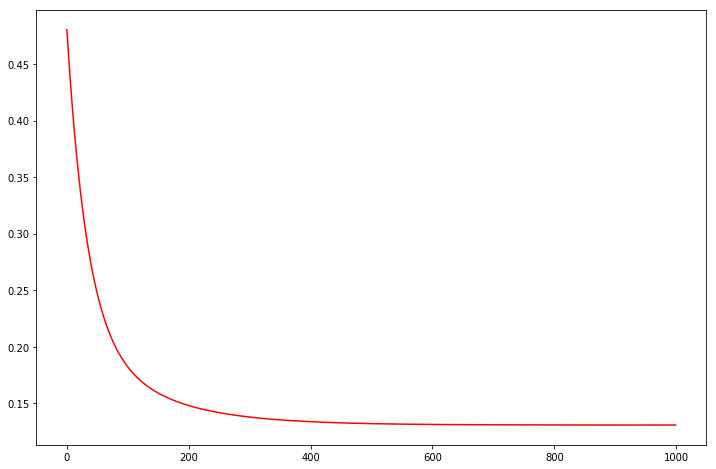

In [118]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(inters), cost2, 'r')

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [119]:
from sklearn import linear_model

In [122]:
model = linear_model.LinearRegression()
data = pd.read_csv( 'ex1data1.txt', header = None, names =['Population', 'Profit'])
data.insert(0,'ones', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)

In [123]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

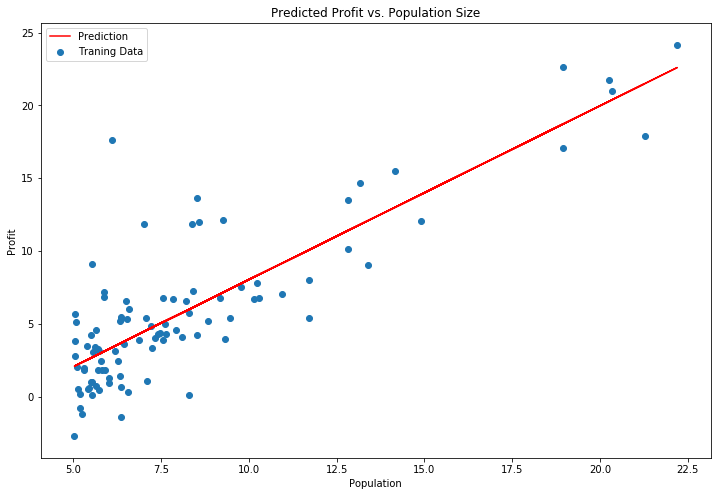

In [131]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.A1.html
x = np.array(X[:,1])
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 正规方程
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。 上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [132]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [133]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])